# Text Mining with NLTK Library
--------

In [359]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import re
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords

In [360]:
data_ = pd.read_csv("C:\ARTIFICIAL INTELLIGENCE/03 - Machine Learning/01 - Resource/back_translated_data.csv")

In [361]:
data_

,id,premise,hypothesis,lang_abv,language,label
0,cc6c64c687,أعلنت منظمة الصحة العالمية أن استراتيجية جديدة...,طورت منظمة الصحة العالمية استراتيجية لعلاج الس...,ar,Arabic,1
1,526fdc06e0,ملحوظة: هديتك أمر بالغ الأهمية لاحتفالنا بالذك...,نحتفل اليوم بالافتتاح الكبير لأحدث مسرح شرطة ف...,ar,Arabic,2
2,e4bbe7bb97,"Она даже не знает свадьбы, она даже не знает, ...","Она знала, что собиралась делать.",ru,Russian,2
3,ec3331392d,जनसंख्या वृद्धि विपरीत दिशा में प्रदूषण की तरह...,जनसंख्या वृद्धि प्रदूषण के विपरीत है।,hi,Hindi,0
4,e65978db8f,لیکن اس کے علاوہ ، مجھے امید ہے کہ یہ زیادہ گر...,مجھے امید ہے کہ کرسمس پر برف کے علاوہ موسم مزی...,ur,Urdu,0
...,...,...,...,...,...,...
11941,32cacb4eaf,"Hatimaye waliongeza ukanda, nyumba ya sanaa na...",Aliongeza vitu vitatu.,sw,Swahili,0
11942,36c00ef778,Сивите очи на младия господар се втренчиха в н...,Младежът я погледна.,bg,Bulgarian,0
11943,beda0e4a56,De 6 a 6 años: tour gratuito y tarifa militar ...,"Desafortunadamente, en este momento no hay nin...",es,Spanish,2
11944,5f33019f95,"Toplam sistemin enerjisi, dipol ters oryantasy...",İki kutupluların yönlerini değiştirmeleri mümk...,tr,Turkish,0


<AxesSubplot:xlabel='lang_abv', ylabel='count'>

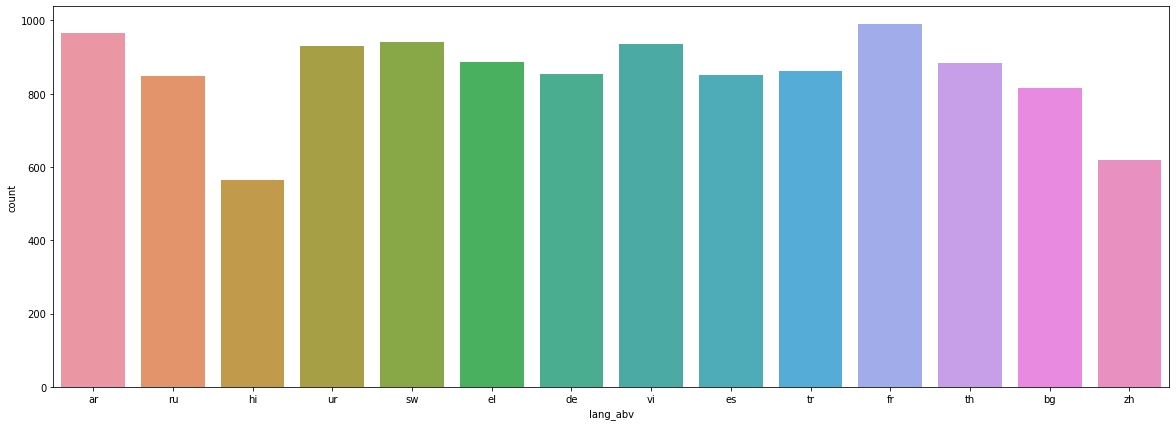

In [362]:
plt.figure(figsize = (20, 7))
sns.countplot(x="lang_abv", data=data_)

In [363]:
data_.isnull().sum()

id            0
premise       0
hypothesis    0
lang_abv      0
language      0
label         0
dtype: int64

In [364]:
data_arabic = data_[data_["lang_abv"] == "ar"]

In [365]:
data_russian = data_[data_["lang_abv"] == "ru"]

In [366]:
data_hindi = data_[data_["lang_abv"] == "hi"]

In [367]:
data_urdu = data_[data_["lang_abv"] == "ur"]

In [368]:
data_swahili = data_[data_["lang_abv"] == "sw"]

In [369]:
data_greek = data_[data_["lang_abv"] == "el"]

In [370]:
data_german = data_[data_["lang_abv"] == "de"]

In [371]:
data_vietnamese = data_[data_["lang_abv"] == "vi"]

In [372]:
data_spanish = data_[data_["lang_abv"] == "es"]

In [373]:
data_turkish = data_[data_["lang_abv"] == "tr"]

In [374]:
data_french = data_[data_["lang_abv"] == "fr"]

In [375]:
data_thai = data_[data_["lang_abv"] == "th"]

In [376]:
data_bulgarian = data_[data_["lang_abv"] == "bg"]

In [377]:
data_chinese = data_[data_["lang_abv"] == "zh"]

In [378]:
data_arabic_ = data_arabic.iloc[:, [1, 2, 3]]

In [379]:
data_bulgarian_ = data_bulgarian.iloc[:, [1, 2, 3]]

In [380]:
data_chinese_ = data_chinese.iloc[:, [1, 2, 3]]

In [381]:
data_french_ = data_french.iloc[:, [1, 2, 3]]

In [382]:
data_german_ = data_german.iloc[:, [1, 2, 3]]

In [383]:
data_greek_ = data_greek.iloc[:, [1, 2, 3]]

In [384]:
data_hindi_ = data_hindi.iloc[:, [1, 2, 3]]

In [385]:
data_russian_ = data_russian.iloc[:, [1, 2, 3]]

In [386]:
data_spanish_ = data_spanish.iloc[:, [1, 2, 3]]

In [387]:
data_swahili_ = data_swahili.iloc[:, [1, 2, 3]]

In [388]:
data_thai_ = data_thai.iloc[:, [1, 2, 3]]

In [389]:
data_turkish_ = data_turkish.iloc[:, [1, 2, 3]]

In [390]:
data_urdu_ = data_urdu.iloc[:, [1, 2, 3]]

In [391]:
data_vietnamese_ = data_vietnamese.iloc[:, [1, 2, 3, 4]]

---------------

In [395]:
data_spanish_.shape

(850, 3)

In [404]:
data_spanish_ = data_spanish_[:].values

In [405]:
data_spanish_ = pd.DataFrame(data = data_spanish_, columns=["text 1", "text 2", "code"])

In [406]:
data_spanish_label = pd.DataFrame(data=np.zeros(850), columns=["label"])

In [409]:
data_spanish__ = pd.concat([data_spanish_, data_spanish_label], axis=1)

In [410]:
data_spanish__

,text 1,text 2,code,label
0,Se dio cuenta de que tal vez ella misma lo irr...,Pensó que tal vez podría irritarla.,es,0.0
1,Dios conoce muchas mentiras y puedo probarlo.,Puedo probar la información falsa en la transa...,es,0.0
2,El cercano Xlapak tiene solo un edificio princ...,Xlapak tiene un palacio.,es,0.0
3,Estaré encantado de responder cualquier pregun...,Me encantaría responder a la pregunta.,es,0.0
4,"Para asesorarlo, no dude en comunicarse con Ka...",Kathy Dannels respondió a la llamada de inmedi...,es,0.0
...,...,...,...,...
845,La mayoría de los hogares tendrán un belén lis...,Las escenas de nacimiento son muy complejas.,es,0.0
846,Los Juegos Olímpicos de 1992 distinguieron a B...,Los Juegos Olímpicos tuvieron lugar en España ...,es,0.0
847,Lo que vemos es una descripción.,Los detalles están impresos en papel legal par...,es,0.0
848,Los conejos no se vieron afectados por estos s...,Los rabinos no conocían las señales.,es,0.0


In [411]:
data_french_.shape

(989, 3)

In [412]:
data_french_ = data_french_[:].values
data_french_ = pd.DataFrame(data=data_french_, columns=["text 1", "text 2", "code"])

In [413]:
data_french_

,text 1,text 2,code
0,"Oh, pour moi, j'aime l'ambiance","Je me sens en sécurité ici, c'est pourquoi j'a...",fr
1,Il est venu et a ouvert la porte Je me souvien...,Il a essayé de ne pas nous faire sentir à l'in...,fr
2,Veuillez éviter de vous faire prendre dans not...,La liste de nos donateurs décédés est rendue p...,fr
3,Une voix rauque fit un appel pour un bateau qu...,Lorsque le navire est entré en collision avec ...,fr
4,Il y a une différence entre les soupçons diabo...,Le scepticisme cannibale est plus courant que ...,fr
...,...,...,...
984,Les renseignements du Congrès - et les contre-...,Le Congrès n'a jamais surveillé le renseigneme...,fr
985,"Ils n'ont pas de neige, ils ne savent pas ce q...",Les habitants d'Amarillo refusent de quitter l...,fr
986,"De plus, la mort inévitable de Pokémon nous do...","Avec l'extinction de Ni, une nouvelle opportun...",fr
987,Les treize couleurs de ce magnifique tapis sym...,"Cette nation avait treize colonies, et plus on...",fr


In [415]:
data_french_label = pd.DataFrame(data=np.ones(989), columns=["label"])

In [416]:
data_french__ = pd.concat([data_french_, data_french_label], axis=1)

In [417]:
data_french__

,text 1,text 2,code,label
0,"Oh, pour moi, j'aime l'ambiance","Je me sens en sécurité ici, c'est pourquoi j'a...",fr,1.0
1,Il est venu et a ouvert la porte Je me souvien...,Il a essayé de ne pas nous faire sentir à l'in...,fr,1.0
2,Veuillez éviter de vous faire prendre dans not...,La liste de nos donateurs décédés est rendue p...,fr,1.0
3,Une voix rauque fit un appel pour un bateau qu...,Lorsque le navire est entré en collision avec ...,fr,1.0
4,Il y a une différence entre les soupçons diabo...,Le scepticisme cannibale est plus courant que ...,fr,1.0
...,...,...,...,...
984,Les renseignements du Congrès - et les contre-...,Le Congrès n'a jamais surveillé le renseigneme...,fr,1.0
985,"Ils n'ont pas de neige, ils ne savent pas ce q...",Les habitants d'Amarillo refusent de quitter l...,fr,1.0
986,"De plus, la mort inévitable de Pokémon nous do...","Avec l'extinction de Ni, une nouvelle opportun...",fr,1.0
987,Les treize couleurs de ce magnifique tapis sym...,"Cette nation avait treize colonies, et plus on...",fr,1.0


In [418]:
data_spanish_french_ = pd.concat([data_french__, data_spanish__], axis=0)

In [419]:
data_spanish_french_

,text 1,text 2,code,label
0,"Oh, pour moi, j'aime l'ambiance","Je me sens en sécurité ici, c'est pourquoi j'a...",fr,1.0
1,Il est venu et a ouvert la porte Je me souvien...,Il a essayé de ne pas nous faire sentir à l'in...,fr,1.0
2,Veuillez éviter de vous faire prendre dans not...,La liste de nos donateurs décédés est rendue p...,fr,1.0
3,Une voix rauque fit un appel pour un bateau qu...,Lorsque le navire est entré en collision avec ...,fr,1.0
4,Il y a une différence entre les soupçons diabo...,Le scepticisme cannibale est plus courant que ...,fr,1.0
...,...,...,...,...
845,La mayoría de los hogares tendrán un belén lis...,Las escenas de nacimiento son muy complejas.,es,0.0
846,Los Juegos Olímpicos de 1992 distinguieron a B...,Los Juegos Olímpicos tuvieron lugar en España ...,es,0.0
847,Lo que vemos es una descripción.,Los detalles están impresos en papel legal par...,es,0.0
848,Los conejos no se vieron afectados por estos s...,Los rabinos no conocían las señales.,es,0.0


In [420]:
data_spanish_french_ = data_spanish_french_[:].values

In [421]:
data_spanish_french_ = pd.DataFrame(data = data_spanish_french_, columns=["text 1", "text 2", "code", "label"])

In [422]:
data_spanish_french_

,text 1,text 2,code,label
0,"Oh, pour moi, j'aime l'ambiance","Je me sens en sécurité ici, c'est pourquoi j'a...",fr,1
1,Il est venu et a ouvert la porte Je me souvien...,Il a essayé de ne pas nous faire sentir à l'in...,fr,1
2,Veuillez éviter de vous faire prendre dans not...,La liste de nos donateurs décédés est rendue p...,fr,1
3,Une voix rauque fit un appel pour un bateau qu...,Lorsque le navire est entré en collision avec ...,fr,1
4,Il y a une différence entre les soupçons diabo...,Le scepticisme cannibale est plus courant que ...,fr,1
...,...,...,...,...
1834,La mayoría de los hogares tendrán un belén lis...,Las escenas de nacimiento son muy complejas.,es,0
1835,Los Juegos Olímpicos de 1992 distinguieron a B...,Los Juegos Olímpicos tuvieron lugar en España ...,es,0
1836,Lo que vemos es una descripción.,Los detalles están impresos en papel legal par...,es,0
1837,Los conejos no se vieron afectados por estos s...,Los rabinos no conocían las señales.,es,0


<AxesSubplot:xlabel='label', ylabel='count'>

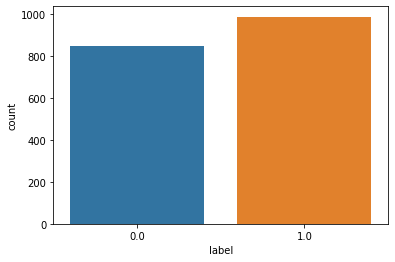

In [423]:
sns.countplot(x="label", data=data_spanish_french_)

In [424]:
compile_1 = []

In [425]:
compile_2 = []

In [334]:
ps = PorterStemmer()

In [426]:
for i in range(989):

    x = re.sub("[^a-zA-Z]", " ", str(data_spanish_french_.iloc[:989, 0][i]))
    x = x.lower().split()
    x = [ps.stem(word=word_) for word_ in x if word_ is not set(stopwords.words("french"))]
    x = " ".join(x)
    compile_1.append(x)

In [431]:
for i in range(989, 1839):

    x = re.sub("[^a-zA-Z]", " ", str(data_spanish_french_.iloc[989:, 0][i]))
    x = x.lower().split()
    x = [ps.stem(word=word_) for word_ in x if word_ is not set(stopwords.words("spanish"))]
    x = " ".join(x)
    compile_2.append(x)

In [435]:
compile_ = compile_1 + compile_2

In [436]:
from sklearn.feature_extraction.text import CountVectorizer

In [437]:
cv = CountVectorizer()

In [443]:
x = cv.fit_transform(compile_).toarray()
y = data_spanish_french_.iloc[:, -1].values

In [444]:
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [445]:
y

array([1.0, 1.0, 1.0, ..., 0.0, 0.0, 0.0], dtype=object)

In [455]:
y = np.array(y).astype(int)

In [456]:
from sklearn.model_selection import train_test_split

In [457]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 1/3, random_state = 0)

In [458]:
from sklearn.preprocessing import StandardScaler

In [459]:
sc = StandardScaler()

In [460]:
x_train_sc = sc.fit_transform(x_train)
x_test_sc = sc.fit_transform(x_test)

In [461]:
from sklearn.linear_model import LogisticRegression

In [462]:
lg = LogisticRegression()

In [464]:
lg.fit(x_train_sc, y_train)

LogisticRegression()

In [465]:
y_pred = lg.predict(x_test_sc)

In [466]:
y_pred_ = pd.DataFrame(data = y_pred, columns=["Predict Y"])

In [467]:
y_test_ = pd.DataFrame(data = y_test, columns=["Real Y"])

In [468]:
q = pd.concat([y_test_, y_pred_], axis = 1)

In [469]:
q

,Real Y,Predict Y
0,1,1
1,1,1
2,0,0
3,1,1
4,0,0
...,...,...
608,1,1
609,1,1
610,0,0
611,1,1


In [470]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [471]:
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)

In [472]:
cm

array([[273,   0],
       [  1, 339]], dtype=int64)

In [474]:
ac = accuracy_score(y_true=y_test, y_pred=y_pred)

In [475]:
ac

0.99836867862969

In [476]:
from xgboost import XGBClassifier

In [477]:
xgb = XGBClassifier()

In [478]:
xgb.fit(x_train_sc, y_train)

C:\Users\90545\AppData\Local\Programs\Python\Python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
[15:04:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=2, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [479]:
y_pred = xgb.predict(x_test_sc)

In [481]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [482]:
cm = confusion_matrix(y_true = y_test, y_pred = y_pred )

In [483]:
cm

array([[272,   1],
       [ 14, 326]], dtype=int64)

In [484]:
ac = accuracy_score(y_true=y_test, y_pred=y_pred)

In [485]:
ac

0.9755301794453507

--------------

In [486]:
data_turkish_

,premise,hypothesis,lang_abv
15,Kabul edilemez ifadelere bir alternatif olarak...,Kalp kırıklığından kaçının.,tr
40,"1 İnsanlar dikiş makinelerinde, kumaş hizalama...",Makinelerin tamamen insanların yerini alması u...,tr
44,"19. yüzyılın sonunda, terim hakkında çok tartı...","Kelime, 19. yüzyılın sonlarında terk edildi ve...",tr
46,"(Dba) bir hayır kurumu, tamamen gönüllü, kar a...",Her gün çalışan 20 gönüllü var.,tr
47,Bu işlemi tamamladıktan sonra dua kitabı okuna...,Dua ederken başka şeyler olacak.,tr
...,...,...,...
11905,"Demokratikleşme, uluslararası coğrafyanın altı...","Demokrasinin, uluslararası coğrafyanın gerçekl...",tr
11925,. Aşağı ve yukarı hareket ediyor.,Yukarı ve aşağı yürümek.,tr
11928,[Bu ulus] özgürlük içinde tasarlandı ve tüm in...,Bu teklife ilişkin notlar birkaç ek belgeye ka...,tr
11937,"""Bunu yapsaydı bunun bir fark yaratacağını san...","Ustası, her iki seçimin de önemli bir etkisi o...",tr


In [487]:
data_turkish_label = pd.DataFrame(data=np.zeros(861), columns=["label"])

In [488]:
data_turkish_ = data_turkish_[:].values

In [489]:
data_turkish_ = pd.DataFrame(data=data_turkish_, columns=["text 1", "text 2", "code"])

In [490]:
data_turkish_ = pd.concat([data_turkish_, data_turkish_label], axis=1)

In [491]:
data_turkish_

,text 1,text 2,code,label
0,Kabul edilemez ifadelere bir alternatif olarak...,Kalp kırıklığından kaçının.,tr,0.0
1,"1 İnsanlar dikiş makinelerinde, kumaş hizalama...",Makinelerin tamamen insanların yerini alması u...,tr,0.0
2,"19. yüzyılın sonunda, terim hakkında çok tartı...","Kelime, 19. yüzyılın sonlarında terk edildi ve...",tr,0.0
3,"(Dba) bir hayır kurumu, tamamen gönüllü, kar a...",Her gün çalışan 20 gönüllü var.,tr,0.0
4,Bu işlemi tamamladıktan sonra dua kitabı okuna...,Dua ederken başka şeyler olacak.,tr,0.0
...,...,...,...,...
856,"Demokratikleşme, uluslararası coğrafyanın altı...","Demokrasinin, uluslararası coğrafyanın gerçekl...",tr,0.0
857,. Aşağı ve yukarı hareket ediyor.,Yukarı ve aşağı yürümek.,tr,0.0
858,[Bu ulus] özgürlük içinde tasarlandı ve tüm in...,Bu teklife ilişkin notlar birkaç ek belgeye ka...,tr,0.0
859,"""Bunu yapsaydı bunun bir fark yaratacağını san...","Ustası, her iki seçimin de önemli bir etkisi o...",tr,0.0
